In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. 
y = iris.target
# print(X)
# print(y)
# print(iris)

In [38]:
svc = svm.SVC(kernel='poly', degree=3).fit(X, y)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


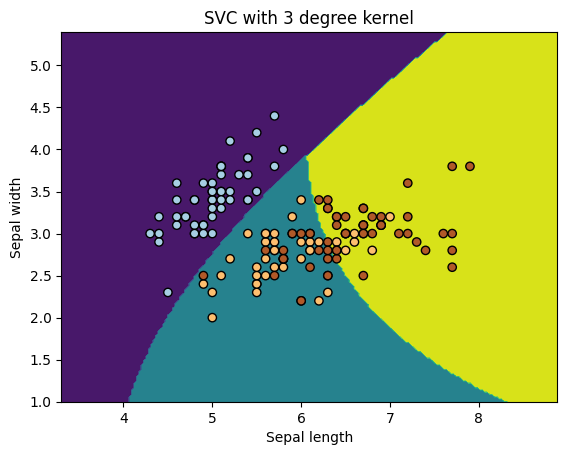

In [ ]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)
plt.contourf(xx, yy, Z, alpha=1)


# In[10]:


plt.scatter(X[:, 0], X[:, 1], c=y , cmap=plt.cm.Paired, linewidth=1, edgecolor='black')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('SVC with 3 degree kernel')
plt.show()

[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[5.         5.19607227 5.37727026 5.54505231 5.70060315 5.84489938
 5.97875595 6.10285982 6.21779499 6.3240614  6.42208938 6.51225097
 6.59486883 6.67022326 6.73855795 6.80008452 6.8549863  6.90342134
 6.94552493 6.98141163 7.01117689 7.03489843 7.05263722 7.06443834
 7.07033151 7.07033151 7.06443834 7.05263722 7.03489843 7.01117689
 6.98141163 6.94552493 6.90342134 6.8549863  6.80008452

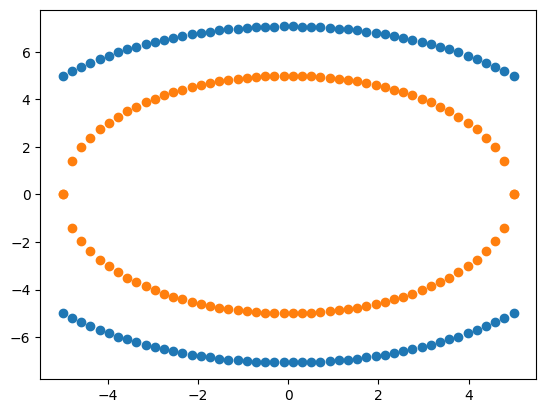

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 50)
print(x)
y = np.sqrt(50 - x**2)
print(y)
y = np.hstack([y,-y])
print(y)
x = np.hstack([x,-x])
x1 = np.linspace(-5, 5, 50)
y1 = np.sqrt(25 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])
plt.scatter(x,y)
plt.scatter(x1,y1)

In [ ]:
df1 = pd.DataFrame(np.vstack([y,x]).T, columns =['x1','x2'] )
df1['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1,x1]).T, columns =['x1','x2'] )
df2['Y'] = 1
df = df1.append(df2)
df.head(5)

/var/folders/hk/j2hbfd2s14s_68gyc6mq_dn40000gn/T/ipykernel_4228/2954156591.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df1.append(df2)


,x1,x2,Y
0,5.000000,-5.000000,0
1,5.196072,-4.795918,0
2,5.377270,-4.591837,0
3,5.545052,-4.387755,0
4,5.700603,-4.183673,0


In [ ]:
X = df.iloc[:,:2]
y = df.Y
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: Y, Length: 200, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

In [41]:
#polynomial kernel
df['x1cube']= df['x1']**3
df['x2cube']= df['x2']**3
df['x1**2*x2']= df['x1']**2*df['x2']
df['x1*x2**2']= df['x1']*df['x2']**2
df.head(5)

,x1,x2,Y,x1cube,x2cube,x1**2*x2,x1*x2**2
0,5.000000,-5.000000,0,125.000000,-125.000000,-125.000000,125.000000
1,5.196072,-4.795918,0,140.289623,-110.310117,-129.485801,119.513990
2,5.377270,-4.591837,0,155.483960,-96.818715,-132.773122,113.379553
3,5.545052,-4.387755,0,170.497079,-84.474794,-134.912961,106.755537
4,5.700603,-4.183673,0,185.251795,-73.227354,-135.956319,99.778362


In [42]:
X = df[['x1','x2','x1cube','x2cube','x1**2*x2','x1*x2**2']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state=0)
X_train

,x1,x2,x1cube,x2cube,x1**2*x2,x1*x2**2
34,4.608812,1.938776,97.896468,7.287567,41.181820,17.323836
66,-6.854986,1.734694,-322.121545,5.219976,81.514718,-20.627770
26,7.064438,0.306122,352.559902,0.028687,15.277435,0.662015
13,4.414961,-2.346939,86.055878,-12.927224,-45.746245,24.318141
68,-4.820821,1.326531,-112.037409,2.334274,30.828991,-8.483119
...,...,...,...,...,...,...
67,-6.903421,1.530612,-328.997912,3.585878,72.944734,-16.173155
92,-3.499271,-3.571429,-42.848217,-45.553936,-43.731778,-44.633559
17,4.759961,-1.530612,107.847507,-3.585878,-34.679428,11.151511
47,5.377270,4.591837,155.483960,96.818715,132.773122,113.379553


In [43]:

#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [44]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.65


In [45]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y = 'x2', z='x1**2*x2',color='Y')
fig.show()

In [46]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1', y = 'x2', z='x1*x2**2',color='Y')
fig.show()

In [47]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1cube', y = 'x2cube', z='x1**2*x2',color='Y')
fig.show()

In [48]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1cube', y = 'x2cube', z='x1*x2**2',color='Y')
fig.show()

In [49]:
import plotly.express as px
fig = px.scatter_3d(df, x='x1cube', y = 'x2cube', z= 'x1**2*x2' ,color='x1*x2**2',
                 hover_data=['x1'],title='Iris Scatter Plot with 4 Dimensions')
fig.show()